**Import Packages**

In [18]:
import math
import numpy as np
import os
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas_datareader as pdr
from datetime import datetime, timedelta

**Download Dataset**

In [19]:
import yfinance as yf

ticker = 'TSLA'
stock ="Tesla Motors Inc."
#  here we will use n  days historical data to predict next day closing
ts_points = 120
# train_data[0:60,0]

today = datetime.today()
# start_date ='2016-01-01'
start_date = (today - timedelta(days=5*365) ).strftime('%Y-%m-%d')

# end_date   = today.strftime('%Y-%m-%d')
end_date = (today - timedelta(days=62) ).strftime('%Y-%m-%d')

stock_df = yf.download(ticker, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [20]:
# Date is an index but to be sure , let's sort
stock_df = stock_df.sort_index(ascending=True)
stock_df

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,,
2019-11-25 00:00:00+00:00,22.422667,22.422667,22.971333,22.297333,22.954666,185092500
2019-11-26 00:00:00+00:00,21.927999,21.927999,22.366667,21.806667,22.351334,119211000
2019-11-27 00:00:00+00:00,22.086000,22.086000,22.261999,21.904667,22.074667,83334000
2019-11-29 00:00:00+00:00,21.996000,21.996000,22.084000,21.833332,22.073999,36984000
2019-12-02 00:00:00+00:00,22.324667,22.324667,22.425333,21.912666,21.959999,91117500
...,...,...,...,...,...,...
2024-09-13 00:00:00+00:00,230.289993,230.289993,232.669998,226.320007,228.000000,59515100
2024-09-16 00:00:00+00:00,226.779999,226.779999,229.960007,223.529999,229.300003,54323000


In [21]:
stock_df.isna().sum()

,,0
Price,Ticker,
Adj Close,TSLA,0
Close,TSLA,0
High,TSLA,0
Low,TSLA,0
Open,TSLA,0
Volume,TSLA,0


In [22]:
stock_df.shape

(1212, 6)

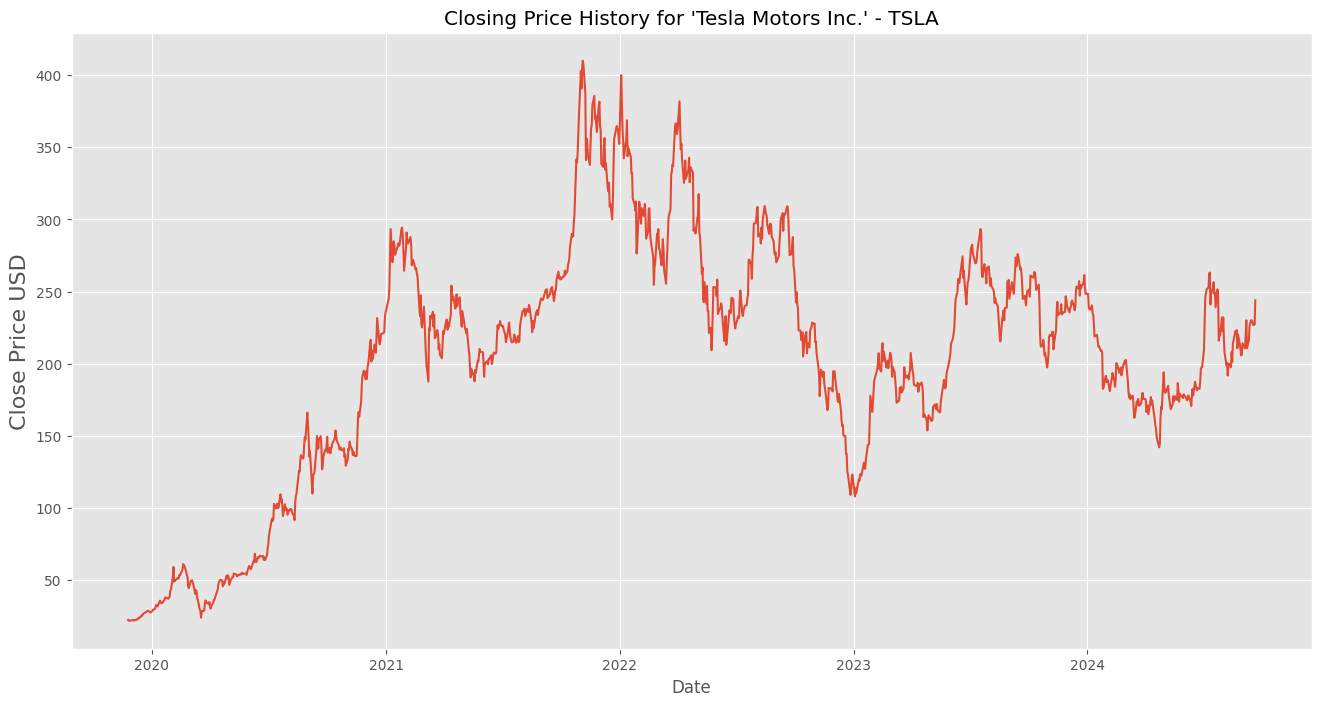

In [23]:
# Visualize closing price history
plt.figure(figsize=(16,8))
plt.title (f"Closing Price History for '{stock}' - {ticker}")
plt.plot(stock_df['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price USD', fontsize=16)
plt.savefig('his_'+ticker+'.png')
plt.show()

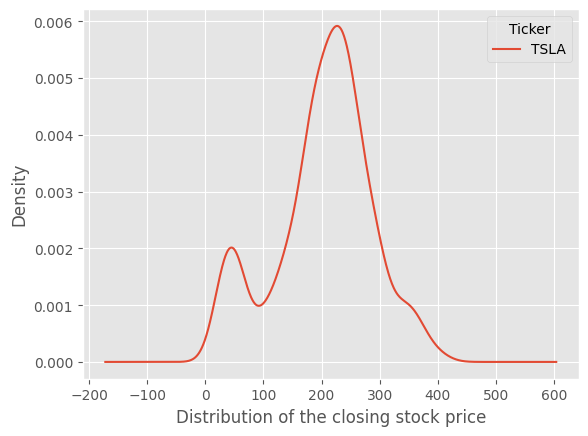

In [24]:
stock_df['Close'].plot.density()
plt.xlabel('Distribution of the closing stock price')
plt.savefig('den_'+ticker+'.png')
plt.show()

In [25]:
# DF with only close
TSdata_df = stock_df['Close']
TSdata_df

Ticker,TSLA
Date,
2019-11-25 00:00:00+00:00,22.422667
2019-11-26 00:00:00+00:00,21.927999
2019-11-27 00:00:00+00:00,22.086000
2019-11-29 00:00:00+00:00,21.996000
2019-12-02 00:00:00+00:00,22.324667
...,...
2024-09-13 00:00:00+00:00,230.289993
2024-09-16 00:00:00+00:00,226.779999
2024-09-17 00:00:00+00:00,227.869995


In [26]:
TSdata_arr = TSdata_df.values # this creates an array of Close Price
TSdata_arr

array([[ 22.42266655],
       [ 21.9279995 ],
       [ 22.08600044],
       ...,
       [227.86999512],
       [227.19999695],
       [243.91999817]])

In [27]:
# Scale the Data
scaler = MinMaxScaler(feature_range =(0,1))
scaled_data = scaler.fit_transform(TSdata_arr)
# split
training_data_len = math.ceil(len(TSdata_arr) * 0.75)
training_data_len
# Created scaled training dataset
train_data = scaled_data[0:training_data_len]

In [28]:
X_train_list = []
y_train_list = []

for i in range(ts_points, len(train_data)):
    X_train_list.append(train_data[i-ts_points:i,0])
    y_train_list.append(train_data[i,0])

X_train_array = np.array(X_train_list)
y_train_array = np.array(y_train_list)

In [29]:
X_train = np.reshape(X_train_array, (X_train_array.shape[0], X_train_array.shape[1], 1))
X_train

array([[[1.27477709e-03],
        [0.00000000e+00],
        [4.07174856e-04],
        ...,
        [8.15049210e-02],
        [8.07902244e-02],
        [8.32744933e-02]],

       [[0.00000000e+00],
        [4.07174856e-04],
        [1.75240807e-04],
        ...,
        [8.07902244e-02],
        [8.32744933e-02],
        [8.23089584e-02]],

       [[4.07174856e-04],
        [1.75240807e-04],
        [1.02222821e-03],
        ...,
        [8.32744933e-02],
        [8.23089584e-02],
        [8.36060706e-02]],

       ...,

       [[2.49771928e-01],
        [2.61033603e-01],
        [2.61909787e-01],
        ...,
        [6.07078614e-01],
        [6.18082549e-01],
        [6.64598179e-01]],

       [[2.61033603e-01],
        [2.61909787e-01],
        [2.58920430e-01],
        ...,
        [6.18082549e-01],
        [6.64598179e-01],
        [6.71453117e-01]],

       [[2.61909787e-01],
        [2.58920430e-01],
        [2.82345740e-01],
        ...,
        [6.64598179e-01],
        [6.7145

**Train TimeSeries Model**

In [30]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(tf.keras.layers.LSTM(50, return_sequences=False))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(25))
model.add(tf.keras.layers.Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [31]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train_array, batch_size=64 ,epochs=30)

Epoch 1/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - loss: 0.1291
Epoch 2/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - loss: 0.0138
Epoch 3/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - loss: 0.0111
Epoch 4/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - loss: 0.0075
Epoch 5/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - loss: 0.0063
Epoch 6/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 178ms/step - loss: 0.0057
Epoch 7/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - loss: 0.0057
Epoch 8/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - loss: 0.0050
Epoch 9/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - loss: 0.0044
Epoch 10/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - loss: 0.0045
Epoch 11/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 124ms/step - loss: 0.0048
Epoch 12/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 172ms/step - loss: 0.0039
Epoch 13/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - loss: 0.0044
Epoch 14/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - loss: 0.0041
Epoch 15/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - lo

In [32]:
model.save('Model_'+ticker+'.h5')

In [33]:
# Bring in the last  (120 values) from training set so when X_test is used to predict , predictions have same shape as Y_test
# The for loop starts with 'ts_points' that means the resultant array will have 120 less rows and hense the above step
test_data = scaled_data[training_data_len-ts_points:]
X_test = []
y_test = TSdata_arr[training_data_len:]
for i in range(ts_points, len(test_data)):
    X_test.append(test_data[i-ts_points:i,0])
# convert the data to a numpy array to use it in LSTM MODEL
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],  X_test.shape[1], 1))

In [34]:
# Models predicted price for X_test
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step


In [35]:
# Plot
train = TSdata_df[:training_data_len]
actual = TSdata_df[training_data_len:]
actual['Predictions'] = predictions
actual

<ipython-input-35-bb86776ae978>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actual['Predictions'] = predictions


Ticker,TSLA,Predictions
Date,,
2023-07-10 00:00:00+00:00,269.609985,267.335419
2023-07-11 00:00:00+00:00,269.790009,269.052032
2023-07-12 00:00:00+00:00,271.989990,270.068237
2023-07-13 00:00:00+00:00,277.899994,270.725677
2023-07-14 00:00:00+00:00,281.380005,271.612640
...,...,...
2024-09-13 00:00:00+00:00,230.289993,221.611084
2024-09-16 00:00:00+00:00,226.779999,223.767395
2024-09-17 00:00:00+00:00,227.869995,225.485901


In [36]:
actual.columns

Index(['TSLA', 'Predictions'], dtype='object', name='Ticker')

In [37]:
train

Ticker,TSLA
Date,
2019-11-25 00:00:00+00:00,22.422667
2019-11-26 00:00:00+00:00,21.927999
2019-11-27 00:00:00+00:00,22.086000
2019-11-29 00:00:00+00:00,21.996000
2019-12-02 00:00:00+00:00,22.324667
...,...
2023-06-30 00:00:00+00:00,261.769989
2023-07-03 00:00:00+00:00,279.820007
2023-07-05 00:00:00+00:00,282.480011


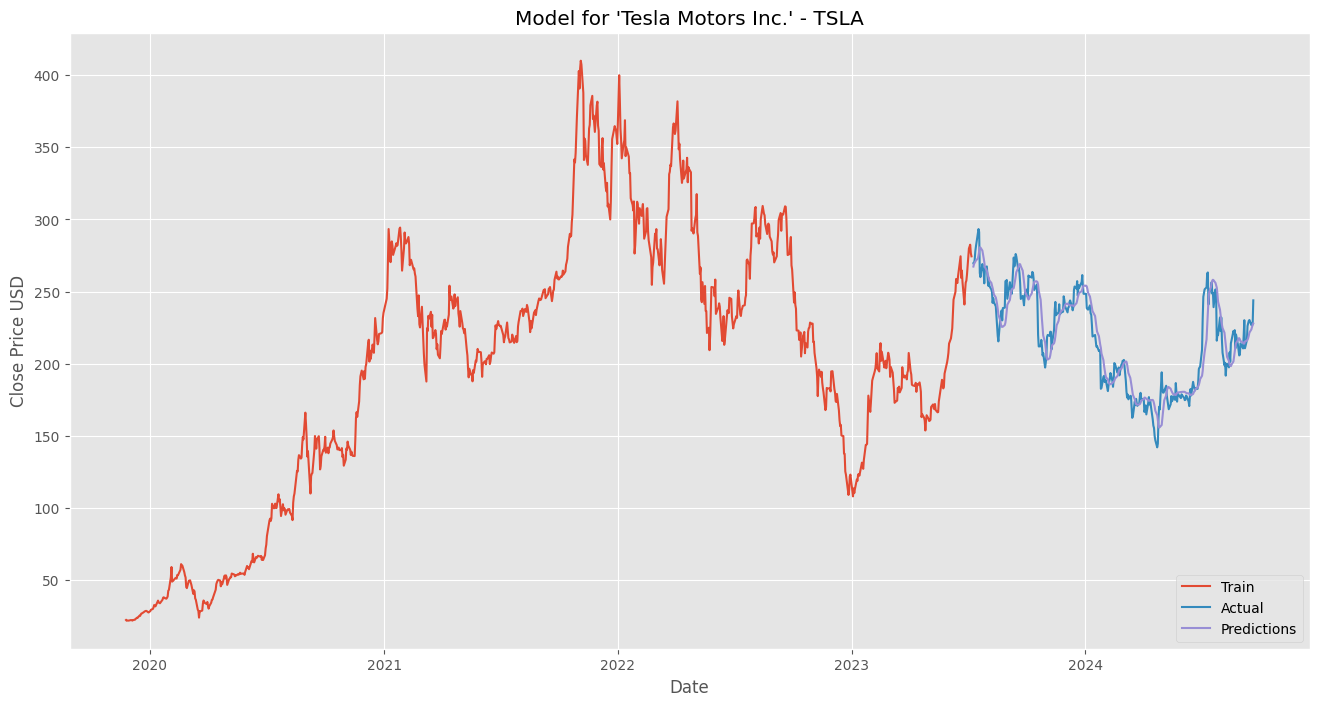

In [38]:
plt.figure(figsize=(16,8))
plt.title(f"Model for '{stock}' - {ticker}")
plt.xlabel("Date")
plt.ylabel("Close Price USD")
plt.plot(train)
plt.plot(actual[['TSLA', 'Predictions']])
plt.legend(['Train', 'Actual', 'Predictions'], loc='lower right')
plt.savefig(ticker+'.png')
plt.show()

In [39]:
X_train.shape

(789, 120, 1)

In [40]:
X_train_array.shape

(789, 120)

In [41]:
X_train = np.reshape(X_train_array, (X_train_array.shape[0], X_train_array.shape[1], 1))
X_train

array([[[1.27477709e-03],
        [0.00000000e+00],
        [4.07174856e-04],
        ...,
        [8.15049210e-02],
        [8.07902244e-02],
        [8.32744933e-02]],

       [[0.00000000e+00],
        [4.07174856e-04],
        [1.75240807e-04],
        ...,
        [8.07902244e-02],
        [8.32744933e-02],
        [8.23089584e-02]],

       [[4.07174856e-04],
        [1.75240807e-04],
        [1.02222821e-03],
        ...,
        [8.32744933e-02],
        [8.23089584e-02],
        [8.36060706e-02]],

       ...,

       [[2.49771928e-01],
        [2.61033603e-01],
        [2.61909787e-01],
        ...,
        [6.07078614e-01],
        [6.18082549e-01],
        [6.64598179e-01]],

       [[2.61033603e-01],
        [2.61909787e-01],
        [2.58920430e-01],
        ...,
        [6.18082549e-01],
        [6.64598179e-01],
        [6.71453117e-01]],

       [[2.61909787e-01],
        [2.58920430e-01],
        [2.82345740e-01],
        ...,
        [6.64598179e-01],
        [6.7145

**Clustering Quality Metrics**

In [42]:
from sklearn.metrics import mean_squared_error

# Models predicted price for X_train
predictions_tr = model.predict(X_train)
predictions_tr = scaler.inverse_transform(predictions_tr)

y_train_tr =  scaler.inverse_transform(y_train_array.reshape(-1,1))
rmse_tr = math.sqrt(mean_squared_error(y_train_tr, predictions_tr))
rmse_tr

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


16.033440146009077